## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
   
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=128, activation="relu")(input_layer)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    x = keras.layers.Dense(units=16, activation="relu")(x)
    x = keras.layers.Dense(units=8, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 106us/step - loss: 2.1742 - acc: 0.1726 - val_loss: 2.0351 - val_acc: 0.2311
Epoch 2/100
50000/50000 [==============================] - 5s 90us/step - loss: 1.9708 - acc: 0.2585 - val_loss: 1.9180 - val_acc: 0.2659
Epoch 3/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.8962 - acc: 0.2843 - val_loss: 1.8748 - val_acc: 0.2856
Epoch 4/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.8329 - acc: 0.3106 - val_loss: 1.8117 - val_acc: 0.3159
Epoch 5/100
50000/50000 [==============================] - 5s 93us/step - loss: 1.7893 - acc: 0.3276 - val_loss: 1.7785 - val_acc: 0.3313
Epoch 6/100
50000/50000 [==============================] - 5s 94us/step - loss: 1.7468 - acc: 0.3437 - val_loss: 1.7360 - val_acc: 0.3437
Epoch 7/100
50000/50000 [==============================] - 5s 95us/step -

Epoch 58/100
50000/50000 [==============================] - 5s 97us/step - loss: 1.2399 - acc: 0.5516 - val_loss: 1.4634 - val_acc: 0.4914
Epoch 59/100
50000/50000 [==============================] - 5s 97us/step - loss: 1.2271 - acc: 0.5563 - val_loss: 1.5049 - val_acc: 0.4788
Epoch 60/100
50000/50000 [==============================] - 5s 97us/step - loss: 1.2257 - acc: 0.5568 - val_loss: 1.4867 - val_acc: 0.4849
Epoch 61/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.2204 - acc: 0.5585 - val_loss: 1.5036 - val_acc: 0.4791
Epoch 62/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.2150 - acc: 0.5585 - val_loss: 1.5256 - val_acc: 0.4713
Epoch 63/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.2081 - acc: 0.5622 - val_loss: 1.4924 - val_acc: 0.4811
Epoch 64/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.2047 - acc: 0.5620 - val_loss: 1.5095 - val_acc: 0.4805
Epoch 65/100
50000/50000 [=

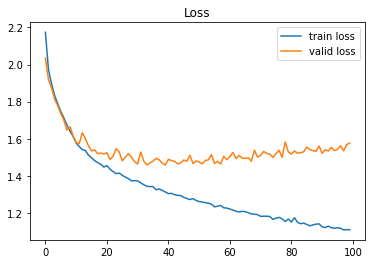

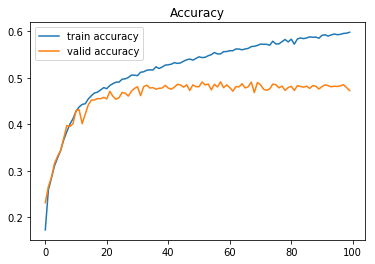

In [15]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()